In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
def rgb2gray(img):
    gray = 0.2126*img[...,2]+0.7152*img[...,1]+0.0722*img[...,0]
    return gray

# ガボールフィルタ

In [27]:
def gabor_filter(K,s,g,l,p,A):
    out = np.zeros((K,K), dtype=np.float32)
    A = A/180*np.pi
    
    for y in range(K):
        for x in range(K):
            yt,xt = y-K//2,x-K//2
            xd = np.cos(A)*xt +np.sin(A)*yt
            yd = np.cos(A)*yt -np.sin(A)*xt
            out[y,x] = np.exp(-(xd**2 + g**2 * yd**2)/(2*(s**2)))*np.cos((2*np.pi*xd)/l+p)
    
    out /= np.sum(np.abs(out))
    return out

def gabor_filtering(img,K,s,g,l,p,A):
    f = gabor_filter(K,s,g,l,p,A)
    out = np.zeros_like(img)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]

    out = cv2.filter2D(gray_img,-1,f)
    out = np.clip(out, 0, 255)
                
    return out

def gabor_edge_detect(img):
    K=11
    s=1.5
    g = 1.2
    l =3
    p=0
    out = np.zeros_like(img,dtype=np.float64)
    for A in [0, 45, 90, 135]:
        out += gabor_filtering(gray_img,K, s, g, l, p,A=A)
        
    out = out.astype(np.uint8)
    return out

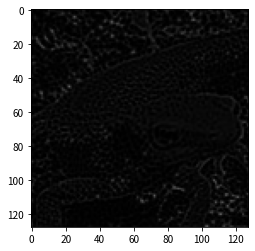

In [29]:
img = cv2.imread("./img/imori.jpg")
gray_img = rgb2gray(img)
out = gabor_edge_detect(gray_img)

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)) 
plt.show()